In [1]:
import re
import unicodedata
import pandas as pd
import nltk
from wordcloud import WordCloud
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import env
import acquire2
import prepare

In [2]:
df = prepare.prep_data()
df.head(5)

,repo,language,content
1,CharlesPikachu/Games,Python,div aligncenter img srcdocslogopng width600 di...
2,channingbreeze/games,JavaScript,phaser phaserphaserphaserhttpwwwphaserchinacom...
3,arcxingye/EatKano,JavaScript,p aligncenter hrefhttpsxingyemegameeatkanoimg ...
4,coding-horror/basic-computer-games,C#,updating first million selling computer book b...
5,rwv/chinese-dos-games,Python,do do 1898 python 3 python python downloaddata...


In [35]:
dftest = df.loc[158,'content']

In [38]:
df[df.content.str.contains("&#9;")]

,repo,language,content
1,CharlesPikachu/Games,Python,div aligncenter img srcdocslogopng width600 di...
13,openai/retro,C,status maintenance expect bug fix minor update...
15,LeagueSandbox/GameServer,C#,build status build status codecovio league san...
24,bombomby/optick,C#,optick c profiler github github release br opt...
28,nikitasrivatsan/DeepLearningVideoGames,Python,using deep q network learn video strategy niki...
29,nikitasrivatsan/DeepLearningVideoGames,Python,using deep q network learn video strategy niki...
33,qiao/PathFinding.js,JavaScript,pathfindingjs comprehensive pathfinding librar...
42,jhuckaby/Effect-Games,JavaScript,overview effect provides suite developer tool ...
62,yukuyoulei/ILRuntime_HotGames,C#,loadload streamingassets sdk streamingassetspe...
81,Bitlits/NFT-Games,JavaScript,p aligncenter img srchttpsipostimgcchlmrx2mylo...


In [37]:
prepare.basic_clean(dftest)

'gameserver  src  dbsqlmapper mybaits sqlmap  resource   ibatisgeneratorconfig ibatisgenerator  tomcatconfig tomcatcontext  webinf   tomcat   tomcat   tomcat   web  ibatis   ibator  mina209'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 1 to 475
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   repo      353 non-null    object
 1   language  353 non-null    object
 2   content   353 non-null    object
dtypes: object(3)
memory usage: 11.0+ KB


In [4]:
def split_data(df):
    '''
    This function performs split on game data, stratify language.
    Returns train, validate, and test dfs. It is an all-in-all function.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.language)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.language)
    return train, validate, test


In [5]:
train, validate, test = split_data(df)

In [6]:
train.shape

(197, 3)

In [7]:
validate.shape

(85, 3)

In [8]:
test.shape

(71, 3)

In [9]:
train

,repo,language,content
115,gameplay3d/gameplay,C++,img srchttpsrawgithubusercontentcomgameplay3dg...
395,rtait/github-games,HTML,welcome github project based learning activity...
166,ChainSafe/web3.unity,C#,p aligncenter img srchttpsuserimagesgithubuser...
26,Ubpa/GAMES102,C++,102 0 102 102 ustcztmailustceducnmailtoustcztm...
162,Artikash/Textractor,C++,textractor looksscreenshotpng englishreadmemd ...
...,...,...,...
217,datamllab/rlcard,Python,rlcard toolkit reinforcement learning card img...
156,google/flatui,C++,flatui version 110 flatuireadme welcome flatui...
116,Zulko/easyAI,Python,easyai easyai full documentation purepython ar...
158,yongzhidai/GameServer,Java,gameserver &#9; src &#9; dbsqlmapper mybaits s...


What are the most common words in READMEs?

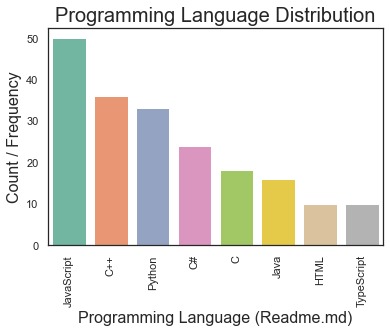

In [10]:
sns.set_theme(style="white")
ax = sns.countplot(x="language", data=train, palette="Set2",order = train['language'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Programming Language (Readme.md)', size = 16)
ax.set_ylabel('Count / Frequency', size = 16)
ax.set_title("Programming Language Distribution", size = 20)
plt.show()

In [11]:
train.language.value_counts()

JavaScript    50
C++           36
Python        33
C#            24
C             18
Java          16
HTML          10
TypeScript    10
Name: language, dtype: int64

## Top 5 Languages for ALL Readmes: Javascript, C++, Python, C#, C

In [12]:
# Set up word counts dataframe
all_text = ' '.join(train.content)
javascripttxt = ' '.join(train[train.language == 'JavaScript'].content)
pythontxt = ' '.join(train[train.language == 'Python'].content)
cplustxt = ' '.join(train[train.language == 'C++'].content)
csharptxt = ' '.join(train[train.language == 'C#'].content)
ctxt = ' '.join(train[train.language == 'C'].content)

In [13]:
# frequency df
all_freq = pd.Series(str(all_text).split()).value_counts()
javascr_freq = pd.Series(str(javascripttxt).split()).value_counts()
python_freq = pd.Series(str(pythontxt).split()).value_counts()
cplus_freq = pd.Series(str(cplustxt).split()).value_counts()
csharp_freq = pd.Series(str(csharptxt).split()).value_counts()
c_freq = pd.Series(str(ctxt).split()).value_counts()

### Javascript

In [14]:
javascr_freq.head(5)

class      132
add        126
install     90
run         88
method      85
dtype: int64

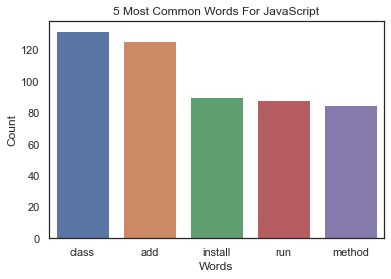

In [15]:
sns.barplot(x = javascr_freq.head(5).index, y = javascr_freq.head(5).values)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('5 Most Common Words For JavaScript')
plt.show()

(-0.5, 799.5, 799.5, -0.5)

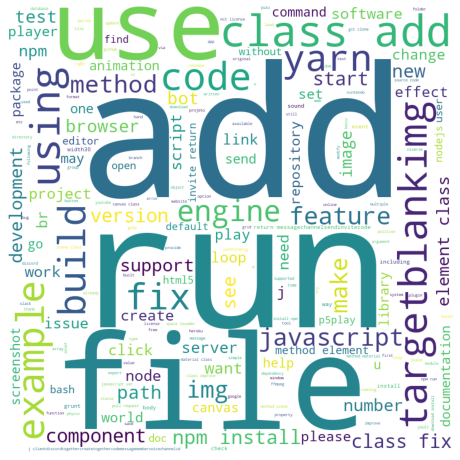

In [16]:
# wordcloud
j_cloud = WordCloud(background_color='white', height=800, width=800).generate(javascripttxt)
plt.figure(figsize=(8, 10))
plt.imshow(j_cloud)
ax.set_title('Top Words for JavaScript')
plt.axis('off')

In [17]:
j_bigrams = pd.Series(nltk.ngrams(javascripttxt.split(), 2)).value_counts().head(5)
j_bigrams

(class, add)        50
(npm, install)      29
(class, fix)        28
(element, class)    24
(br, &#9;)          23
dtype: int64

(-0.5, 799.5, 399.5, -0.5)

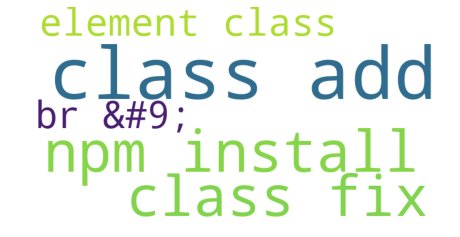

In [18]:
# bigram
data = {k[0] + ' ' + k[1]: v for k, v in j_bigrams.to_dict().items()}
j_bigramc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 10))
plt.imshow(j_bigramc)
ax.set_title('Top Words for JavaScript')
plt.axis('off')

## Python

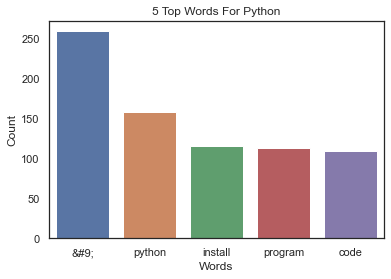

In [19]:
sns.barplot(x = python_freq.head(5).index, y = python_freq.head(5).values)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('5 Top Words For Python')
plt.show()

(-0.5, 799.5, 799.5, -0.5)

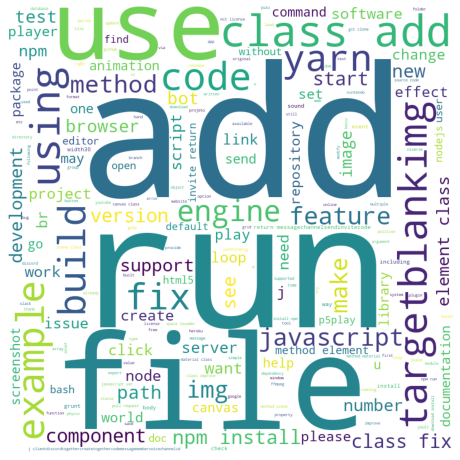

In [20]:
py_cloud = WordCloud(background_color='white', height=1000, width=400).generate((pythontxt))
plt.figure(figsize=(8, 10))
plt.imshow(j_cloud)
ax.set_title('Top Words for Python')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

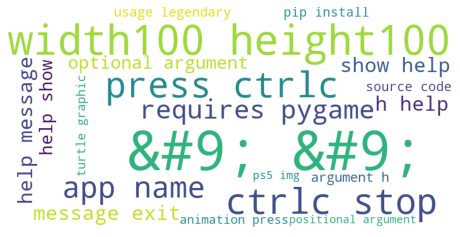

In [21]:
py_bigrams = pd.Series(nltk.ngrams(pythontxt.split(), 2)).value_counts().head(20)
data = {k[0] + ' ' + k[1]: v for k, v in py_bigrams.to_dict().items()}
py_bigramc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 10))
plt.imshow(py_bigramc)
ax.set_title('Top Words for Python')
plt.axis('off')

## C++

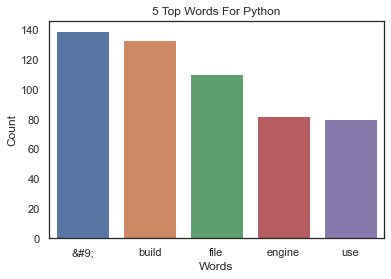

In [22]:
sns.barplot(x = cplus_freq.head(5).index, y = cplus_freq.head(5).values)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('5 Top Words For Python')
plt.show()

(-0.5, 399.5, 999.5, -0.5)

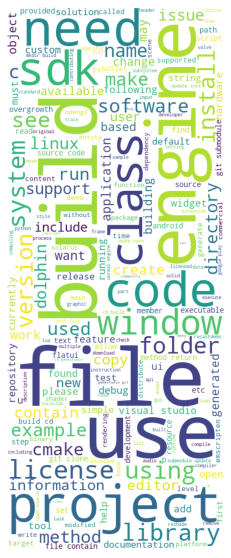

In [23]:
cplus_cloud = WordCloud(background_color='white', height=1000, width=400).generate((cplustxt))
plt.figure(figsize=(8, 10))
plt.imshow(cplus_cloud)
ax.set_title('Top Words for C++')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

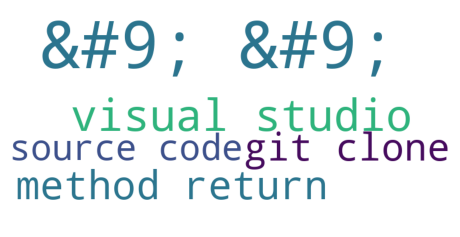

In [24]:
cplus_bigrams = pd.Series(nltk.ngrams(cplustxt.split(), 2)).value_counts().head(5)
data = {k[0] + ' ' + k[1]: v for k, v in cplus_bigrams.to_dict().items()}
cplus_bigramc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 10))
plt.imshow(cplus_bigramc)
ax.set_title('Top Words for C++')
plt.axis('off')

## C#

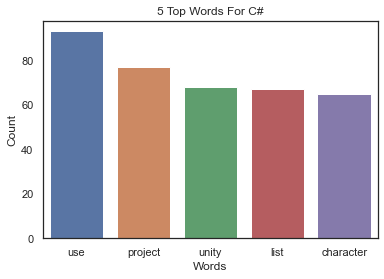

In [25]:
sns.barplot(x = csharp_freq.head(5).index, y = csharp_freq.head(5).values)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('5 Top Words For C#')
plt.show()

(-0.5, 399.5, 999.5, -0.5)

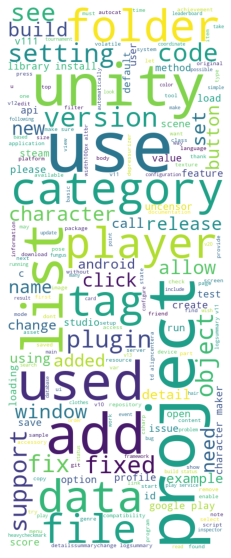

In [26]:
csharp_cloud = WordCloud(background_color='white', height=1000, width=400).generate((csharptxt))
plt.figure(figsize=(8, 10))
plt.imshow(csharp_cloud)
ax.set_title('Top Words for C#')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

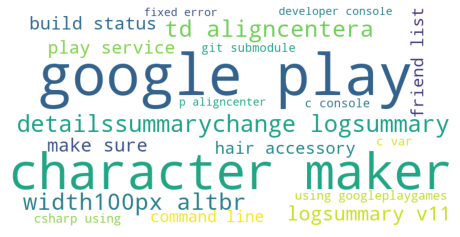

In [27]:
csharp_bigrams = pd.Series(nltk.ngrams(csharptxt.split(), 2)).value_counts().head(20)
data = {k[0] + ' ' + k[1]: v for k, v in csharp_bigrams.to_dict().items()}
csharp_bigramc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 10))
plt.imshow(csharp_bigramc)
ax.set_title('Top Words for C#')
plt.axis('off')

## C

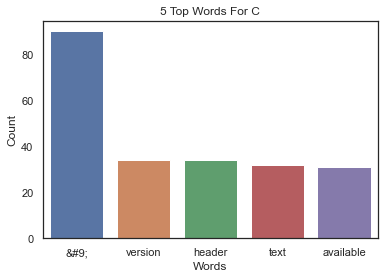

In [28]:
sns.barplot(x = c_freq.head(5).index, y = c_freq.head(5).values)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('5 Top Words For C')
plt.show()

(-0.5, 399.5, 999.5, -0.5)

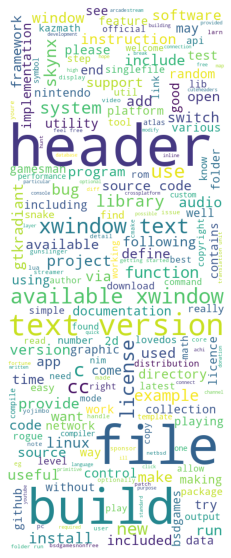

In [29]:
c_cloud = WordCloud(background_color='white', height=1000, width=400).generate((ctxt))
plt.figure(figsize=(8, 10))
plt.imshow(c_cloud)
ax.set_title('Top Words for C')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

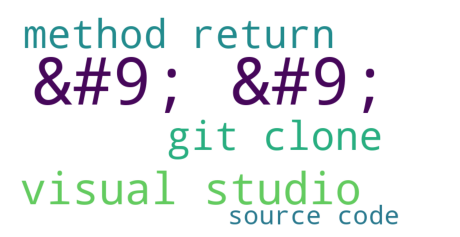

In [30]:
c_bigrams = pd.Series(nltk.ngrams(cplustxt.split(), 2)).value_counts().head(5)
data = {k[0] + ' ' + k[1]: v for k, v in c_bigrams.to_dict().items()}
c_bigramc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 10))
plt.imshow(c_bigramc)
ax.set_title('Top Words for C')
plt.axis('off')